<a href="https://colab.research.google.com/github/evillag/xtol_m5/blob/master/T2/EDA_M5T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 5, Task 2: Prepare and Explore the Data**
## **Data Science with Python (XTOL - Cenfotec)**
## *Author: Esteban  Villalobos*
## *March 5$^{th}$, 2020*


# Introduction

The purpose of this notebook is to do an initial exploratory data analysis of customer credit data for a fictitious company called Credit One.
The dataset to study was provided as part of the XTOL Big Data and Analytics program imparted by Cenfotec, Module 5, task 2.

---

# Dataset description:
The dataset loaded contains labeled records of Taiwan customers' payment habits over a period of 6 months.

**Source**: *Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*

## **Features Information**
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX:
 - 1 = male
 - 2 = female

- EDUCATION: 
 - 1 = graduate school
 - 2 = university
 - 3 = high school
 - 0, 4, 5, 6 = others
- MARRIAGE: 
 - 1 = married
 - 2 = single
 - 3 = divorce
 - 0 =others
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
>
 - PAY_0 = the repayment status in September, 2005
 - PAY_2 = the repayment status in August, 2005
 - . . .
 - PAY_6 = the repayment status in April, 2005.
 
> The measurement scale for the repayment status is:
- -2: No consumption
- -1: Paid in full
- 0: The use of revolving credit
- 1 = payment delay for one month
- 2 = payment delay for two months
- . . .
- 8 = payment delay for eight months
- 9 = payment delay for nine months and above
 
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar):
 - BILL_AMT1 = amount of bill statement in September, 2005
 - BILL_AMT2 = amount of bill statement in August, 2005
 - . . .
 - BILL_AMT6 = amount of bill statement in April, 2005

- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar):
 - PAY_AMT1 = amount paid in September, 2005
 - PAY_AMT2 = amount paid in August, 2005
 - . . .
 - PAY_AMT6 = amount paid in April, 2005

- *default payment next month*: (target variable) client's behavior:
 - 0 = then not default
 - 1 = then default

# Import Libraries

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10.0, 8.0]

# Plot font sizes (source: https://stackoverflow.com/a/39566040/366771)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Reading Data Set using Pandas

In [2]:
credit = pd.read_csv('https://raw.githubusercontent.com/evillag/xtol_m5/master/T2/default%20of%20credit%20card%20clients.csv',
                     header =1, index_col=0)
credit = credit.rename(columns={
    'default payment next month': 'DEFAULT',
    'PAY_0': 'PAY_STATUS_SEP',
    'PAY_2': 'PAY_STATUS_AUG',
    'PAY_3': 'PAY_STATUS_JUL',
    'PAY_4': 'PAY_STATUS_JUN',
    'PAY_5': 'PAY_STATUS_MAY',
    'PAY_6': 'PAY_STATUS_APR',
    'BILL_AMT1': 'BILL_SEP',
    'BILL_AMT2': 'BILL_AUG',
    'BILL_AMT3': 'BILL_JUL',
    'BILL_AMT4': 'BILL_JUN',
    'BILL_AMT5': 'BILL_MAY',
    'BILL_AMT6': 'BILL_APR',
    'PAY_AMT1': 'PAID_SEP',
    'PAY_AMT2': 'PAID_AUG',
    'PAY_AMT3': 'PAID_JUL',
    'PAY_AMT4': 'PAID_JUN',
    'PAY_AMT5': 'PAID_MAY',
    'PAY_AMT6': 'PAID_APR',
})
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Dataset structure

In [3]:
# All columns were imported as integer columns.
credit.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_STATUS_SEP    30000 non-null int64
PAY_STATUS_AUG    30000 non-null int64
PAY_STATUS_JUL    30000 non-null int64
PAY_STATUS_JUN    30000 non-null int64
PAY_STATUS_MAY    30000 non-null int64
PAY_STATUS_APR    30000 non-null int64
BILL_SEP          30000 non-null int64
BILL_AUG          30000 non-null int64
BILL_JUL          30000 non-null int64
BILL_JUN          30000 non-null int64
BILL_MAY          30000 non-null int64
BILL_APR          30000 non-null int64
PAID_SEP          30000 non-null int64
PAID_AUG          30000 non-null int64
PAID_JUL          30000 non-null int64
PAID_JUN          30000 non-null int64
PAID_MAY          30000 non-null int64
PAID_APR          30000 non-null 

In [4]:
# One way to check if there are null values in the dataset...
credit.isna().describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000


## Fix column types

In [5]:
""" 
Even though columns are in numeric format, I'll change them with labels for 
easier analysis.
"""
credit['SEX'].replace([1,2],['male','female'], inplace=True)
credit['EDUCATION'].replace([0,1,2,3,4,5,6],['other','grad_school','university',
                                             'high_school', 'other',
                                             'other','other'], inplace=True)
credit['MARRIAGE'].replace([0,1,2,3],['other', 'married', 'single', 
                                      'divorce'], inplace=True)

def set_payment_status(df, col):
  df[col].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                  ['no_consumption','paid_in_full','use_revolving_credit',
                   'delay_1m','delay_2m','delay_3m','delay_4m','delay_5m',
                   'delay_6m','delay_7m','delay_8m','delay_9m'], inplace=True)

set_payment_status(credit, 'PAY_STATUS_SEP')
set_payment_status(credit, 'PAY_STATUS_AUG')
set_payment_status(credit, 'PAY_STATUS_JUL')
set_payment_status(credit, 'PAY_STATUS_JUN')
set_payment_status(credit, 'PAY_STATUS_MAY')
set_payment_status(credit, 'PAY_STATUS_APR')

credit['DEFAULT'].replace([0,1],['False','True'], inplace=True)

for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_STATUS_SEP','PAY_STATUS_AUG',
            'PAY_STATUS_JUL','PAY_STATUS_JUN','PAY_STATUS_MAY',
            'PAY_STATUS_APR', 'DEFAULT']:            
            credit[col] = credit[col].astype('category')

credit.sample(25)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
15158,50000,female,university,married,26,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,50905,49796,50783,49776,50937,49956,2200,2100,2000,2000,2000,2300,False
18322,480000,female,grad_school,single,32,paid_in_full,paid_in_full,paid_in_full,paid_in_full,paid_in_full,paid_in_full,3655,38022,5785,9233,4893,2168,38024,5785,9233,4893,2168,3625,False
8232,230000,male,university,married,30,paid_in_full,paid_in_full,no_consumption,paid_in_full,paid_in_full,paid_in_full,5200,0,0,8780,11990,0,0,0,8780,11990,0,0,False
9647,30000,female,university,single,34,delay_1m,delay_2m,delay_2m,delay_2m,delay_2m,delay_2m,23860,23192,30042,28276,30483,29848,0,7300,0,2666,0,1000,False
7386,10000,female,high_school,married,49,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,6904,7841,9635,17622,8991,0,1206,2000,176,360,0,0,False
6223,50000,female,university,single,32,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,36211,28530,20084,18088,18476,20168,1709,2004,7497,671,2000,6100,False
27340,170000,male,university,married,37,delay_1m,delay_2m,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,77959,76115,79274,82034,85664,89272,0,5000,5000,5000,5000,5000,False
24142,150000,male,grad_school,single,27,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,149340,152460,141196,105802,106478,107096,10000,6040,5750,3000,5000,35000,False
12411,360000,male,grad_school,married,52,paid_in_full,paid_in_full,paid_in_full,paid_in_full,use_revolving_credit,paid_in_full,14432,15329,13062,41977,24354,25948,15329,13062,41977,0,25948,21318,False


In [6]:
# Check final column types
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null category
EDUCATION         30000 non-null category
MARRIAGE          30000 non-null category
AGE               30000 non-null int64
PAY_STATUS_SEP    30000 non-null category
PAY_STATUS_AUG    30000 non-null category
PAY_STATUS_JUL    30000 non-null category
PAY_STATUS_JUN    30000 non-null category
PAY_STATUS_MAY    30000 non-null category
PAY_STATUS_APR    30000 non-null category
BILL_SEP          30000 non-null int64
BILL_AUG          30000 non-null int64
BILL_JUL          30000 non-null int64
BILL_JUN          30000 non-null int64
BILL_MAY          30000 non-null int64
BILL_APR          30000 non-null int64
PAID_SEP          30000 non-null int64
PAID_AUG          30000 non-null int64
PAID_JUL          30000 non-null int64
PAID_JUN          30000 non-null int64
PAID_MAY          30000 non-null int64
PAID_A

## Review descriptive statistics

In [7]:
credit.describe()

,LIMIT_BAL,AGE,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
credit.describe(include='category')

,SEX,EDUCATION,MARRIAGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,4,4,11,11,11,11,10,10,2
top,female,university,single,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,False
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


# Exploratory Data Analysis

## Distribution of Loans limit balance
It seems the amount being approved as credit follows a gamma distribution because the LIMIT_BAL continuous variable has a higher probability to occur to the left of the graph. 

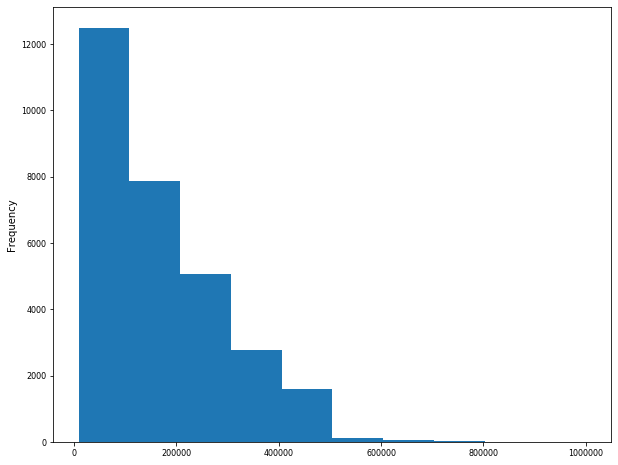

In [9]:
credit['LIMIT_BAL'].plot(kind='hist')

However, by looking into the probability density function (below), we can see that, although it is more probable to get a lower credit limit, there are some "valleys" where probability "stays" stable.

It also makes sense that higher credit amounts are less frequent since they would require a customer with higher income capacity.

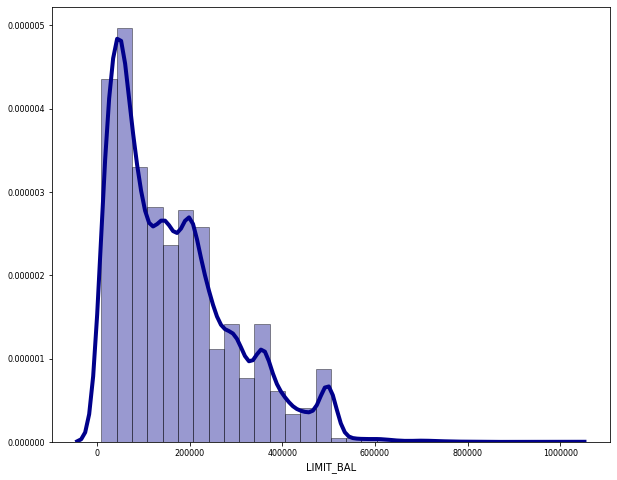

In [10]:
sns.distplot(credit['LIMIT_BAL'], hist=True, kde=True, 
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Data discretization

To make later analysis easier, I'll discretize the columns **LIMIT_BAL** and **AGE**, into buckets, where each bucket will contain a *balanced* number of observations.

In [11]:
credit['LIMIT_BAL_QUANTILE'], bins = pd.qcut(credit['LIMIT_BAL'], q=4, 
                                             retbins=True,
                                             precision=0)
print(f"Limit Balance discretization:\n{credit['LIMIT_BAL_QUANTILE'].value_counts()}")
credit['AGE_QUANTILE'] = pd.qcut(credit['AGE'], q=4, precision=0)
print(f"Age discretization:\n{credit['AGE_QUANTILE'].value_counts()}")
credit[['AGE','AGE_QUANTILE', 'LIMIT_BAL', 'LIMIT_BAL_QUANTILE']].sample(15)

Limit Balance discretization:
(9999.0, 50000.0]        7676
(140000.0, 240000.0]     7643
(50000.0, 140000.0]      7614
(240000.0, 1000000.0]    7067
Name: LIMIT_BAL_QUANTILE, dtype: int64
Age discretization:
(20.0, 28.0]    8013
(28.0, 34.0]    7683
(41.0, 79.0]    7450
(34.0, 41.0]    6854
Name: AGE_QUANTILE, dtype: int64


,AGE,AGE_QUANTILE,LIMIT_BAL,LIMIT_BAL_QUANTILE
ID,,,,
24918,35,"(34.0, 41.0]",50000,"(9999.0, 50000.0]"
9750,60,"(41.0, 79.0]",50000,"(9999.0, 50000.0]"
3997,43,"(41.0, 79.0]",50000,"(9999.0, 50000.0]"
8139,39,"(34.0, 41.0]",380000,"(240000.0, 1000000.0]"
27631,21,"(20.0, 28.0]",10000,"(9999.0, 50000.0]"
28671,49,"(41.0, 79.0]",290000,"(240000.0, 1000000.0]"
28995,41,"(34.0, 41.0]",270000,"(240000.0, 1000000.0]"
29223,24,"(20.0, 28.0]",10000,"(9999.0, 50000.0]"
1753,38,"(34.0, 41.0]",60000,"(50000.0, 140000.0]"


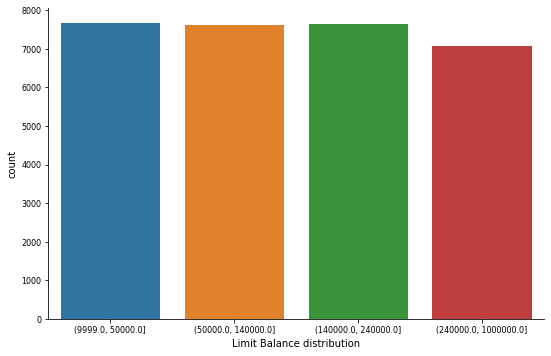

In [12]:
# Count obeservations per balance limit buckets
fg = sns.catplot('LIMIT_BAL_QUANTILE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Limit Balance distribution')
plt.show()

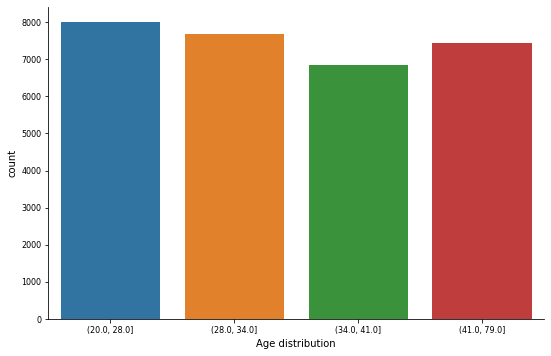

In [13]:
# Count obeservations per age buckets
fg = sns.catplot('AGE_QUANTILE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Age distribution')
plt.show()

### Bill amount vs Payment amount


These set of graphs show the amount of debt vs the amount of the payments per month (one graph per month).

It is interesting to note that in the last two months the debt appeared to increase while payments decreased.

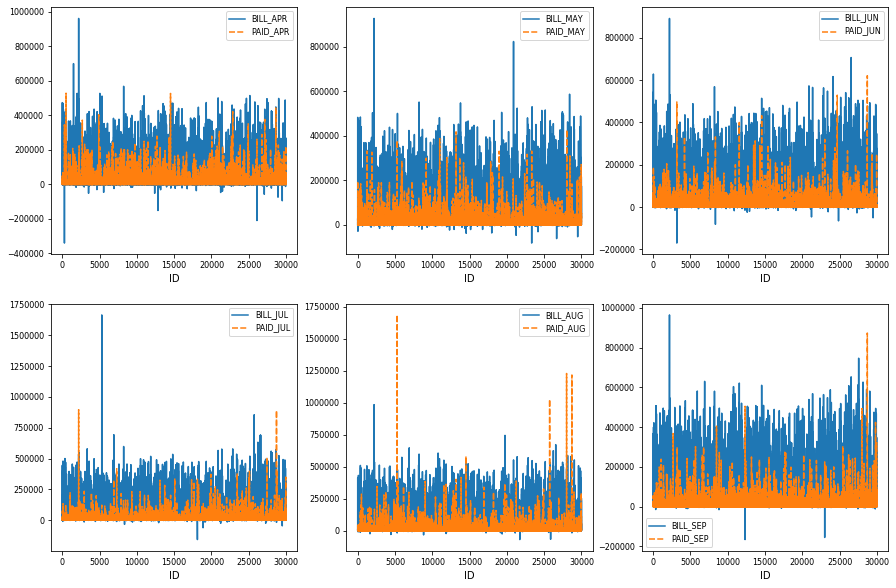

In [14]:
# customers Bills vs Payments
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for col, ax in zip([('BILL_APR','PAID_APR'),
                    ('BILL_MAY','PAID_MAY'), 
                    ('BILL_JUN','PAID_JUN'), 
                    ('BILL_JUL','PAID_JUL'),
                    ('BILL_AUG','PAID_AUG'), 
                    ('BILL_SEP','PAID_SEP')], axes.flatten()):
  #ax.plot(credit[[col]])
  _bill, _paid = col
  sns.lineplot(data=credit[[_bill, _paid]], ax=ax)
plt.show()

Additionally, we can see that most of the customers have a debt if 50k, or less, and the ones with really high debts, are outliers.

Regarding payment, most customers pay the loan minimum, and the ones that pay more than that are the outliers.

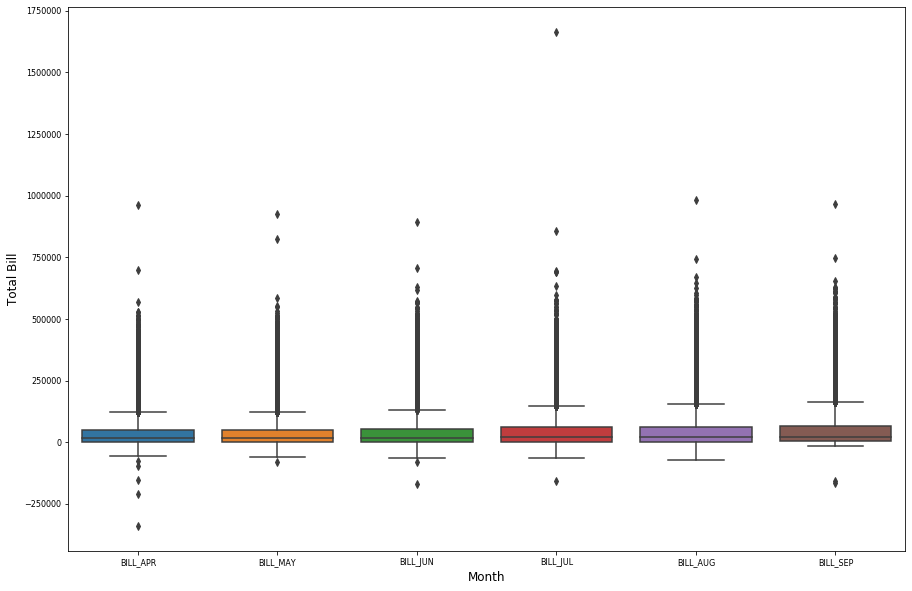

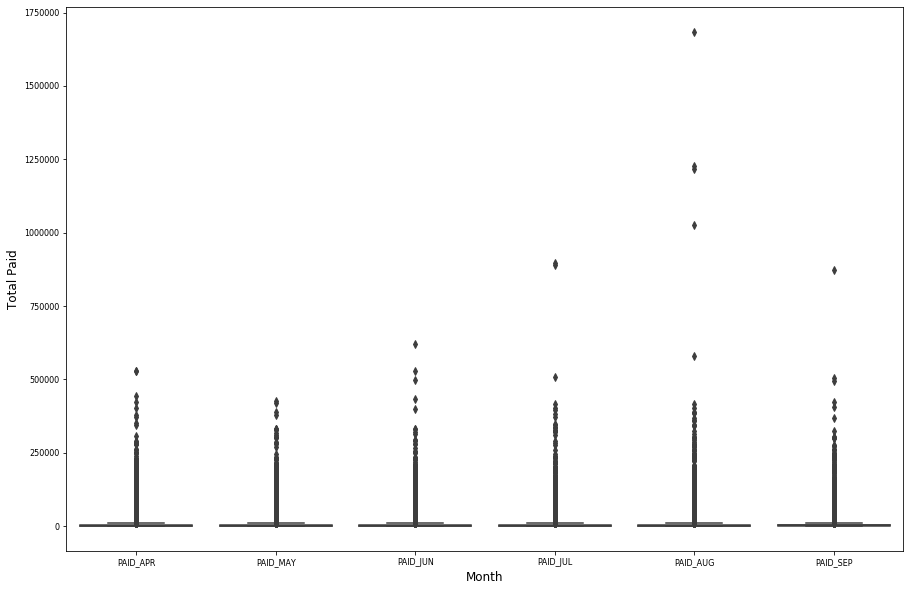

In [15]:
data = credit[['BILL_APR','BILL_MAY','BILL_JUN','BILL_JUL','BILL_AUG', 'BILL_SEP']]
plt.figure(figsize=(15,10))
plt.ylabel('Total Bill', fontsize=12)
plt.xlabel('Month', fontsize=12)
sns.boxplot(data=data,)

data = credit[['PAID_APR','PAID_MAY','PAID_JUN','PAID_JUL','PAID_AUG', 'PAID_SEP']]
plt.figure(figsize=(15,10))
plt.ylabel('Total Paid', fontsize=12)
plt.xlabel('Month', fontsize=12)
sns.boxplot(data=data,)

plt.show()

### Payment status of April vs September


This graph, although it doesn't show great detail, it shows that there were customers in April with no consumption, not delayed in their bills, or with a low number of months delayed, that in September showed 5 or more months of delay in their payments.

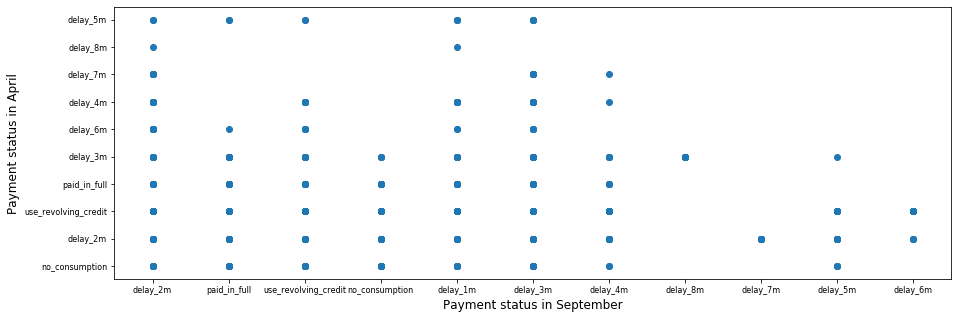

In [16]:
# Payment status in September vs Payment status in August
x = credit['PAY_STATUS_SEP']
y = credit['PAY_STATUS_APR']
plt.figure(figsize=(15,5))
plt.ylabel('Payment status in April', fontsize=12)
plt.xlabel('Payment status in September', fontsize=12)
plt.scatter(x,y)
plt.show()

### Correlation matrix

In [17]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       AGE  BILL_SEP  ...  PAID_JUN  PAID_MAY  PAID_APR
LIMIT_BAL   1.000000  0.144713  0.285430  ...  0.203242  0.217202  0.219595
AGE         0.144713  1.000000  0.056239  ...  0.021379  0.022850  0.019478
BILL_SEP    0.285430  0.056239  1.000000  ...  0.158303  0.167026  0.179341
BILL_AUG    0.278314  0.054283  0.951484  ...  0.147398  0.157957  0.174256
BILL_JUL    0.283236  0.053710  0.892279  ...  0.143405  0.179712  0.182326
BILL_JUN    0.293988  0.051353  0.860272  ...  0.130191  0.160433  0.177637
BILL_MAY    0.295562  0.049345  0.829779  ...  0.293118  0.141574  0.164184
BILL_APR    0.290389  0.047613  0.802650  ...  0.250237  0.307729  0.115494
PAID_SEP    0.195236  0.026147  0.140277  ...  0.199558  0.148459  0.185735
PAID_AUG    0.178408  0.021785  0.099355  ...  0.180107  0.180908  0.157634
PAID_JUL    0.210167  0.029247  0.156887  ...  0.216325  0.159214  0.162740
PAID_JUN    0.203242  0.021379  0.158303  ...  1.000000  0.151830  0.157834
PAID_MAY    

### Covariance

In [18]:
covMat = credit.cov()
print(covMat)

              LIMIT_BAL            AGE  ...      PAID_MAY      PAID_APR
LIMIT_BAL  1.683446e+10  173076.722569  ...  4.305657e+08  5.065153e+08
AGE        1.730767e+05      84.969755  ...  3.218052e+03  3.191904e+03
BILL_SEP   2.727020e+09   38172.933546  ...  1.879091e+08  2.347681e+08
BILL_AUG   2.570130e+09   35613.657962  ...  1.717652e+08  2.204845e+08
BILL_JUL   2.548533e+09   34334.251320  ...  1.904126e+08  2.247817e+08
BILL_JUN   2.453926e+09   30453.108180  ...  1.576892e+08  2.031590e+08
BILL_MAY   2.331481e+09   27654.067800  ...  1.315051e+08  1.774537e+08
BILL_APR   2.243837e+09   26137.648547  ...  2.799982e+08  1.222761e+08
PAID_SEP   4.195711e+08    3992.041735  ...  3.756893e+07  5.469033e+07
PAID_AUG   5.333504e+08    4626.861549  ...  6.368414e+07  6.456816e+07
PAID_JUL   4.801180e+08    4746.824393  ...  4.282921e+07  5.093879e+07
PAID_JUN   4.131202e+08    3087.324192  ...  3.634098e+07  4.395747e+07
PAID_MAY   4.305657e+08    3218.052172  ...  2.334266e+08  4.207

It seems that the customers who have 'other' as their education level are less prone to go default, however, they only represent $1.56\%$ percent of the total sample, which means this is not representative.

It seems that *there is no substantial evidence* that the education level has a big correlation with the fact that a customer went default or not.

## Hypotheses review

### Hypothesis: *Do male customers default more than female ones?*

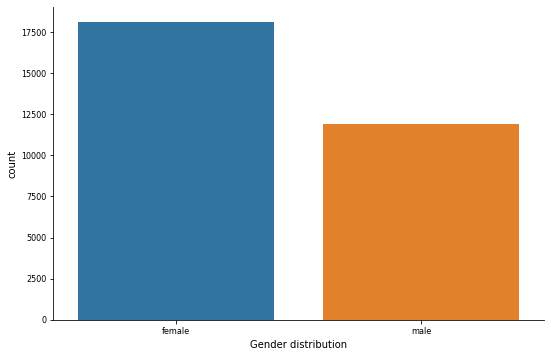

SEX
female    18112
male      11888
Name: SEX, dtype: int64

In [19]:
# Count obeservations per Gender
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Gender distribution')
plt.show()
credit.groupby('SEX')['SEX'].count()

**Note** that the dataset is unblanaced towards womens, there are $38.8\%$ more observations from female customers than males.

SEX     DEFAULT
female  False      14349
        True        3763
male    False       9015
        True        2873
Name: SEX, dtype: int64

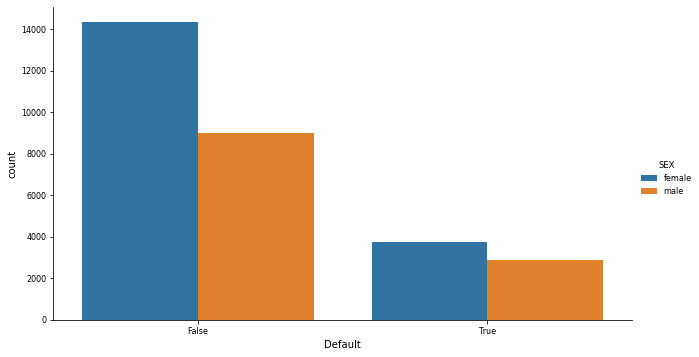

In [20]:
# Group by Gender and default status
g = sns.catplot('DEFAULT', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Default')
credit.groupby(['SEX', 'DEFAULT'])['SEX'].count()

Given that the dataset is unbalanced (there are more observations of female customers), we need to analyze this by percentages:

- Total Male observations: $11,888$

- Total Defaulted Male observations: $2,873$

- Total female observations: $18,112$

- Total Defaulted female observations: $3,763$

- Percentage of Defaulted Males: $0.24167$

- Percentage of Defaulted Females: $0.20777$


---

At plain sight, it seems there is some evidence pointing towards males being more prone to default than women, however, proper hypothesis testing is required.

---


### Hypothesys: *Are customers with low education levels defaulting more than the ones with high education?*

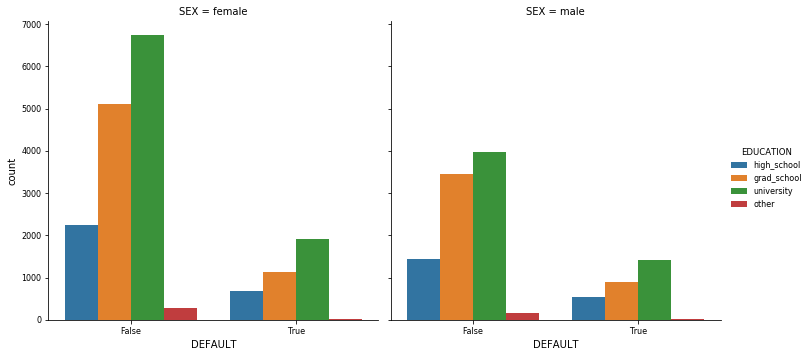

In [21]:
# Plot amount of customers per education level vs the Default column
sns.catplot('DEFAULT', data=credit, hue='EDUCATION', kind='count', 
               hue_order=['high_school', 'grad_school','university','other'],
               col='SEX')

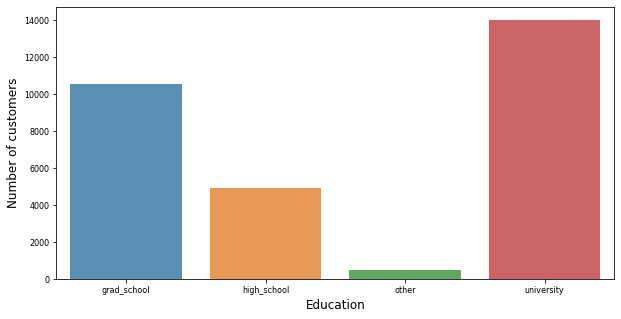

university     14030
grad_school    10585
high_school     4917
other            468
Name: EDUCATION, dtype: int64


In [22]:
# Plot number of observations per education level
# Source: https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts?scriptVersionId=971450

education_count  = credit['EDUCATION'].value_counts()
education_count = education_count[:4,]
plt.figure(figsize=(10,5))
sns.barplot(education_count.index, education_count.values, alpha=0.8)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.show()
print(education_count)

Given that education level columns are quite unbalanced, it is better to analyze by the percentage of customers who defaulted in each education category.

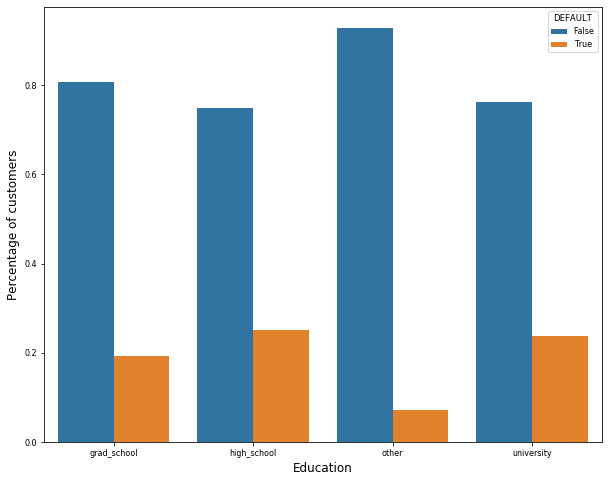

In [23]:
# Show the percentage of defaulted clients per education level
# Source: https://stackoverflow.com/a/53783773/366771

credit['frequency'] = 0 # a dummy column to refer to
counts = credit.groupby(['EDUCATION', 'DEFAULT']).count()
freq_per_group = counts.div(counts.groupby('EDUCATION').transform('sum')).reset_index()
sns.barplot(x='EDUCATION', y='frequency', hue='DEFAULT', data=freq_per_group)
plt.ylabel('Percentage of customers', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.show()
credit = credit.drop(['frequency'], axis=1)

# Normalize and save dataframe for ML tasks

Only columns with monetary amounts will be normalized.

In [24]:
normalizable_df = credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL',
                          'BILL_JUN','BILL_MAY','BILL_APR','PAID_SEP',
                          'PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
                          'PAID_APR',]]
cred_normalized=((normalizable_df-normalizable_df.min())/(normalizable_df.max()-normalizable_df.min()))*20

cred_normalized.sample(15)

,LIMIT_BAL,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
ID,,,,,,,,,,,,,
13998,1.616162,4.050223,2.495378,2.557813,4.780997,3.266915,6.472000,0.000000,0.178120,0.223204,0.048309,0.000000,0.056747
16091,3.030303,2.944117,1.339138,1.739762,3.209914,1.628351,5.237588,0.017767,0.013917,0.008482,0.024992,0.054955,0.014376
15298,6.262626,2.982061,1.373948,1.830474,3.249666,1.665614,5.236020,0.059756,0.112085,0.055645,0.085507,0.000000,0.214956
14967,2.222222,4.491497,2.965717,2.675121,4.791454,3.248432,6.487431,0.075554,0.035885,0.069193,0.096618,0.145359,0.113493
2094,1.414141,2.981671,1.352063,1.740739,3.226512,1.662976,5.238956,0.000000,0.014974,0.028146,0.081224,0.000000,0.029508
7214,2.626263,3.099503,1.446530,1.786331,3.312798,1.716382,5.352845,0.068685,0.000000,0.111602,0.000000,0.406584,0.264817
6087,0.404040,3.239102,1.538434,1.873201,3.304998,1.702619,5.219574,0.052109,0.027644,0.032030,0.002899,0.000000,0.000000
5797,2.626263,2.962682,1.324409,1.740772,3.202755,1.612962,5.250006,0.000000,0.015010,0.000000,0.000000,0.092842,0.051110
11364,6.060606,3.184027,1.481131,1.853227,3.528004,1.829500,5.268527,0.023834,0.136701,0.162292,0.161031,0.150752,0.588576


Overwrite original columns with normalize data

In [0]:
credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL','BILL_JUN','BILL_MAY',
        'BILL_APR','PAID_SEP','PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
        'PAID_APR']] = cred_normalized

In [0]:
# Save to new csv file.
credit.to_csv('normalized_credit_df.csv')